In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.markers as markers
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd

from src.utils.cell_devs.cell_devs_parser import cell_devs_parser

In [36]:
# Cantidad de instantes en los que quiero conocer el valor exacto de cada celda
n_cuts = 80

# Ejemplos

In [37]:
NOMBRE_EXPERIMENTO = 'exp1'
VALORES_INICIALES_ARCHIVO_1 = '0.1_0.05_0.7_0.05_0.1'
VALORES_INICIALES_ARCHIVO_2 = 'valfile_0'
MACROS_ARCHIVO = 'macro_0'
NOMBRE_ARCHIVO = 'opinion_log'
SIMULATION_RESULTS_DIRECTORY =  '/home/pedro/Desktop/Proyectos/multi-formalism-translator/test/data/modelos/cell/opinion-goodwin-minsky/results/'

# MOSTRAR LA EVOLUCION DE CADA VALFILE COMO UNA LINEA. MOSTRAR TODAS LAS LINEAS EN UN MISMO PLOT
def plot_cell_devs(N, M, NOMBRE_EXPERIMENTO, VALORES_INICIALES_ARCHIVO_1, MACROS_ARCHIVO, NOMBRE_ARCHIVO, valfiles):
    pal = sns.color_palette(n_colors=len(valfiles))
    for enum_valfile, n_valfile in enumerate(valfiles):

        filename = SIMULATION_RESULTS_DIRECTORY + VALORES_INICIALES_ARCHIVO_1 + '/' + n_valfile + '/' + MACROS_ARCHIVO + '/' + NOMBRE_ARCHIVO

        parser = cell_devs_parser(filename, N, M)
        evolution, max_time = parser.get_evolution_from_log('opinion')

        evolution_values = [[ [] for j in range(M) ] for i in range(0,N)]
        pts = np.linspace(0,max_time, n_cuts)
        for i in range(0,N):
            for j in range(0,M):
                evolution_values[i][j] = parser.get_cut_values(evolution[i][j], pts)

        # Enter cell to plot evolution
        x = list(map(lambda x : x['time'], evolution_values[0][0]))
        xs = [list(map(lambda x : x['value'], evolution_values[i][j])) 
              for i in range(0,N) for j in range(0,M)]
        z = list(map(sum, zip(*xs)))

        sns.set_style("darkgrid")
        ax = sns.lineplot(
            x=list(map(lambda a : round(a,2), x)), 
            y=list(map(lambda a: a/(M*N), z)),
            color=pal[enum_valfile],
            marker=0,
            label='Escenario ' + str(enum_valfile+1)
        )
        ax.set_ylim(-3,3)
        ax.set_xlim(0,60)
        #ax.set_title(VALORES_INICIALES_ARCHIVO_1)

        tick_spacing = 10
        ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax.xaxis.tick_bottom()
        
        #plt.legend(loc='upper right')
        #plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    plt.xlabel('Tiempo (años)')
    plt.ylabel('Promedio de convicción en población')
    plt.savefig('results-experiments/final-opinion-sin-shocks.png', bbox_inches='tight')
    plt.show()

In [43]:
percentages_list = [
    [0.1 ,0.05,0.7,0.05,0.1]
    #[0.2,0  ,0.6,0,0.2]
]
NOMBRE_EXPERIMENTO = 'exp1'
N = 10
M = 10

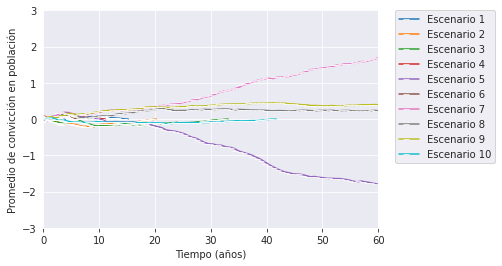

In [44]:
# sin shocks
MACROS_ARCHIVO = 'macro_0'
NOMBRE_ARCHIVO = 'opinion_log_standalone'
n_valfiles = 10
valfiles = ["valfile_"+str(i) for i in range(0,n_valfiles)]

# DOS CASOS, CAMBIANDO EL NOMBRE DEL LOG (opinion_log vs opinion_log_2)
for percentages in percentages_list:
    valores_iniciales = "_".join([str(p) for p in percentages])
    plot_cell_devs(N, M, NOMBRE_EXPERIMENTO, valores_iniciales, MACROS_ARCHIVO, NOMBRE_ARCHIVO, valfiles)


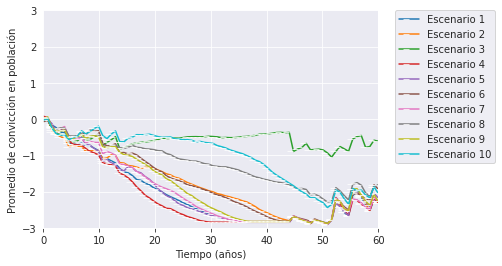

In [45]:
MACROS_ARCHIVO = 'macro_0'
NOMBRE_ARCHIVO = 'opinion_log'
n_valfiles = 10
valfiles = ["valfile_"+str(i) for i in range(0,n_valfiles)]

# DOS CASOS, CAMBIANDO EL NOMBRE DEL LOG (opinion_log vs opinion_log_2)
for percentages in percentages_list:
    valores_iniciales = "_".join([str(p) for p in percentages])
    plot_cell_devs(N, M, NOMBRE_EXPERIMENTO, valores_iniciales, MACROS_ARCHIVO, NOMBRE_ARCHIVO, valfiles)

# ANALIZAR ESTADO FINAL DEL CELL-DEVS

In [ ]:
# AGREGAR LOS RESULTADOS FINALES CORRESPONDIENTES A TODOS LOS VALFILES
def final_state_cell_devs(N, M, NOMBRE_EXPERIMENTO, VALORES_INICIALES_ARCHIVO_1, MACROS_ARCHIVO, NOMBRE_ARCHIVO, valfiles):
    pal = sns.color_palette(n_colors=len(valfiles))
    
    final_means = []
    final_status = {
        'votes_negative': 0, 'votes_positive': 0, 'votes_neutral': 0,
        'negative': 0, 'positive': 0, 'bipartidism': 0, 'indecision': 0, 
        'extra': 0, 'tot': 0
    }
    for enum_valfile, n_valfile in enumerate(valfiles):        
        filename = '../root/modelos/cell/opinion/opinion-goodwin-minsky/experimentos/' + NOMBRE_EXPERIMENTO + '/results/' + VALORES_INICIALES_ARCHIVO_1 + '/' + n_valfile + '/' + MACROS_ARCHIVO + '/' + NOMBRE_ARCHIVO

        parser = cell_devs_parser(filename, N, M)
        evolution, max_time = parser.get_evolution_from_log('opinion')
        
        evolution_values = [[ [] for j in range(M) ] for i in range(0,N)]
        
        pts = np.linspace(0,max_time, n_cuts)
        for i in range(0,N):
            for j in range(0,M):
                evolution_values[i][j] = parser.get_cut_values(evolution[i][j], pts)

        # Enter cell to plot evolution
        x = list(map(lambda x : x['time'], evolution_values[0][0]))
        xs = [list(map(lambda x : x['value'], evolution_values[i][j])) 
              for i in range(0,N) for j in range(0,M)]
        
        # REVISO EL ESTADO FINAL DEL CELL-DEVS
        z1 = list(map(sum, zip(*xs)))
        final_means.append(z1[-1:][0]/(N*M))
        
        final_votes = {'negative': 0, 'neutral': 0, 'positive': 0}
        for cell_values in xs:
            elem = cell_values[-1:][0]
            if elem < -1:
                final_votes['negative'] += 1
            elif elem > 1:
                final_votes['positive'] += 1
            else:
                final_votes['neutral'] += 1
        
        p_votes_negative = final_votes['negative'] / (N*M)
        p_votes_positive = final_votes['positive'] / (N*M)
        p_votes_neutral = final_votes['neutral'] / (N*M)
        
        # Por votos
        if p_votes_positive > p_votes_negative and p_votes_positive > p_votes_neutral:
            final_status['votes_positive'] += 1
        elif p_votes_negative > p_votes_positive and p_votes_negative > p_votes_neutral:
            final_status['votes_negative'] += 1
        else:
            final_status['votes_neutral'] += 1
        
        # Por victoria 
        if p_votes_negative > 0.7:
            final_status['negative'] += 1
        elif p_votes_positive > 0.7:
            final_status['positive'] += 1
        elif p_votes_neutral > 0.7:
            final_status['indecision'] += 1
        elif p_votes_negative > 0.4 and p_votes_positive > 0.4:
            final_status['bipartidism'] += 1
        else:
            final_status['extra'] += 1
            
        # Acumular estados finales analizados
        final_status['tot'] += 1
    
    return (np.mean(final_means), np.median(final_means), final_status)

# EXPERIMENTACION

In [ ]:
N = 10
M = 10
NOMBRE_EXPERIMENTO = 'exp_2018_4mins_3'
MACROS_ARCHIVO = 'macro_0'
NOMBRE_ARCHIVO = 'opinion_log'

n_valfiles = 10
valfiles = ["valfile_"+str(i) for i in range(0,n_valfiles)]

pctgs = []
for p0 in [10,20,30,40,50,60,70,80,90]:
    for pi in range(10,100-p0+1,10):
        m = (100 - pi - p0)/2
        k = [pi/2, m, float(p0), m, pi/2]
        assert(sum(k) == 100)
        k2 = list(map(lambda x: x/100, k))
        assert(round(sum(k2),5) == 1)
        pctgs.append(k2)    
percentages_list = pctgs

df = pd.DataFrame()
for percentages in percentages_list:
    valores_iniciales = "_".join([str(p) for p in percentages])
    mean_, median_, final_status = final_state_cell_devs(N, M, NOMBRE_EXPERIMENTO, valores_iniciales, MACROS_ARCHIVO, NOMBRE_ARCHIVO, valfiles)
    
    assert(percentages[0] == percentages[4])
    p_0 = percentages[2]
    p_influ = percentages[0]
    
    tot = final_status['tot']
    df = df.append({
        'p_0': p_0, 
        'p_influ': p_influ * 2, 
        'mean': mean_,
        'median': median_,
        
        # segun votos
        'p_negative': final_status['votes_negative'] / tot,
        'p_positive': final_status['votes_positive'] / tot,
        'p_sin_definir': final_status['votes_neutral'] / tot,
        
        # segun victorias
        'p_bipartidism': final_status['bipartidism'] / tot,
        'p_unipartidism': (final_status['positive'] + final_status['negative']) / tot,
        'p_indecision': final_status['indecision'] / tot
    }, ignore_index=True)
    
# PIVOT DATAFRAME FOR PLOT
df_mean = df.pivot("p_influ", "p_0", "mean")
df_median = df.pivot("p_influ", "p_0", "median")

df_negative = df.pivot("p_influ", "p_0", "p_negative")
df_indecision = df.pivot("p_influ", "p_0", "p_indecision")
df_bipartidism = df.pivot("p_influ", "p_0", "p_bipartidism")
df_positive = df.pivot("p_influ", "p_0", "p_positive")
df_unipartidism = df.pivot("p_influ", "p_0", "p_unipartidism")
df_sin_definir = df.pivot("p_influ", "p_0", "p_sin_definir")

# Heatmaps

In [ ]:
fig = plt.figure(figsize = (20,20))
ax4 = fig.add_subplot(3, 3, 1)
ax3 = fig.add_subplot(3, 3, 3)
ax6 = fig.add_subplot(3, 3, 2)


sns.heatmap(data=df_bipartidism, ax=ax4, vmin=0, vmax=1, cmap="BuGn", square=True, cbar_kws={'shrink': .8})
ax4.invert_yaxis()
ax4.set_title('Bipartidismo')
ax4.set_xlabel('P0_ini[%]')
ax4.set_ylabel('Influyentes_ini [%]')

sns.heatmap(data=df_indecision, ax=ax3, vmin=0, vmax=1, cmap="BuGn", square=True, cbar_kws={'shrink': .8})
ax3.invert_yaxis()
ax3.set_title('Indecisión')
ax3.set_xlabel('P0_ini[%]')
ax3.set_ylabel('Influyentes_ini [%]')

sns.heatmap(data=df_unipartidism, ax=ax6, vmin=0, vmax=1, cmap="BuGn", square=True, cbar_kws={'shrink': .8})
ax6.invert_yaxis()
ax6.set_title('Unipartidismo')
ax6.set_xlabel('P0_ini[%]')
ax6.set_ylabel('Influyentes_ini [%]')

In [ ]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.add_subplot(3, 3, 1)
ax5 = fig.add_subplot(3, 3, 2)
ax7 = fig.add_subplot(3, 3, 3)

sns.heatmap(data=df_positive, ax=ax2, vmin=0, vmax=1, cmap = "YlOrRd_r", square=True, cbar_kws={'shrink': .8})
sns.heatmap(data=df_negative, ax=ax5, vmin=0, vmax=1, cmap = "YlOrRd_r", square=True, cbar_kws={'shrink': .8})
sns.heatmap(data=df_sin_definir, ax=ax7, vmin=0, vmax=1, cmap = "YlOrRd_r", square=True, cbar_kws={'shrink': .8})

ax2.invert_yaxis()
ax2.set_title('Partido A')
ax2.set_xlabel('P0_ini[%]')
ax2.set_ylabel('Influyentes_ini [%]')

ax5.invert_yaxis()
ax5.set_title('Partido B')
ax5.set_xlabel('P0_ini[%]')
ax5.set_ylabel('Influyentes_ini [%]')

ax7.invert_yaxis()
ax7.set_title('Sin Definir')
ax7.set_xlabel('P0_ini[%]')
ax7.set_ylabel('Influyentes_ini [%]')

# EXPERIMENTACION 2 (EVOLUCION)

In [ ]:
N = 10
M = 10
NOMBRE_EXPERIMENTO = 'exp_2018_4mins_3'
MACROS_ARCHIVO = 'macro_0'
NOMBRE_ARCHIVO = 'opinion_log'
n_valfiles = 10
valfiles = ["valfile_"+str(i) for i in range(0,n_valfiles)]

# pctgs = []
# for p0 in [10,20,30,40,50,60,70,80,90]:
#     for pi in range(10,100-p0+1,10):
#         m = (100 - pi - p0)/2
#         k = [pi/2, m, float(p0), m, pi/2]
#         assert(sum(k) == 100)
#         k2 = list(map(lambda x: x/100, k))
#         assert(round(sum(k2),5) == 1)
#         pctgs.append(k2)    
# percentages_list = pctgs
percentages_list = [[0.3,0.05,0.3,0.05,0.3]]

for percentages in percentages_list:
    valores_iniciales = "_".join([str(p) for p in percentages])
    plot_cell_devs(N, M, NOMBRE_EXPERIMENTO, valores_iniciales, MACROS_ARCHIVO, NOMBRE_ARCHIVO, valfiles)

In [ ]:
# N = 15
# M = 15
# NOMBRE_EXPERIMENTO = 'exp_2018_shockers_Capital_Debt_4'
# VALORES_INICIALES_ARCHIVO_1 = '0.05_0.25_0.4_0.25_0.05'
# MACROS_ARCHIVO = 'macro_0'
# NOMBRE_ARCHIVO = 'opinion_log'
# valfiles = ["valfile_"+str(i) for i in range(0,10)]
# plot_cell_devs(N, M, NOMBRE_EXPERIMENTO, VALORES_INICIALES_ARCHIVO_1, MACROS_ARCHIVO, NOMBRE_ARCHIVO, valfiles)

In [ ]:
# N = 15
# M = 15
# NOMBRE_EXPERIMENTO = 'exp_2018_shockers_Capital_Debt_4'
# VALORES_INICIALES_ARCHIVO_1 = '0.1_0.2_0.4_0.2_0.1'
# MACROS_ARCHIVO = 'macro_0'
# NOMBRE_ARCHIVO = 'opinion_log'
# valfiles = ["valfile_"+str(i) for i in range(0,10)]
# plot_cell_devs(N, M, NOMBRE_EXPERIMENTO, VALORES_INICIALES_ARCHIVO_1, MACROS_ARCHIVO, NOMBRE_ARCHIVO, valfiles)